# Introduction to NumPy

NumPy is a powerful library for numerical computing in Python. It provides support for arrays, matrices, and many mathematical functions to operate on these data structures. It is widely used in data science, machine learning, and scientific computing. Its key features includes

- **N-dimensional array object**: The core of NumPy is the `ndarray`, a fast and space-efficient multidimensional array.
- **Broadcasting**: A powerful mechanism that allows NumPy to work with arrays of different shapes when performing arithmetic operations.
- **Standard mathematical functions**: NumPy provides a wide range of mathematical functions that operate on arrays.
- **Linear algebra, random number generation, and more**: NumPy includes modules for linear algebra, random number generation, Fourier transform, and more.

## 0: Installation

Although it shouldn't matter which Python version you are using, it's a good idea to use the latest version to ensure the compatibility with the latest NumPy version. Note that at the time of this writing, the latest Python version was 3.12.x. You can install Python by following the instruction on: https://www.python.org/downloads/. Then, usually, Python comes with `pip` package manager that manages _most_ of the dependencies for you. Now, to install NumPy, run the following command. (Tips: You can slam `shift+enter` to run the command in notebook environment.)

In [28]:
%pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


I also sneak in `matplotlib` as well for the visualization part which will be used later. Then, importing it the usual way, 

In [29]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('bmh') # use any default palette you like, doesn't matter
print(f"NumPy version: {np.__version__}")

NumPy version: 2.2.1


## 1: `ndarray` as vectors

The `ndarray` is the core data structure of NumPy. It is a multidimensional array of elements that can be used to represented vectors, matrices, and higher-dimensional arrays such as tensors. Obviously, the `ndarray` comes with a basic operation that you can imagine of such as `+`, `-`, `*`, `/`, `**`, and many more. First of, let's look at a few example of how to create a vector and a matrix. 

In [30]:
s = np.array(100.0)                 # create a scalar
x = np.array([5, 6, 1, 3, 5])       # create a vector
y = np.arange(1, 10, step=2)        # start from 1, stop at 10, step by 2
z = np.zeros(5, dtype=float)        # all zeros vector with type float, there is also `np.ones(sz)`
s, x, y, z # you either print this variable or put them on the last line of the cell to display it. 

(array(100.),
 array([5, 6, 1, 3, 5]),
 array([1, 3, 5, 7, 9]),
 array([0., 0., 0., 0., 0.]))

You can then perform basic operations on these vectors as you would do on basic Python variables. For example,  

In [31]:
x + y, x - y, x * y, x / y, x ** y

(array([ 6,  9,  6, 10, 14]),
 array([ 4,  3, -4, -4, -4]),
 array([ 5, 18,  5, 21, 45]),
 array([5.        , 2.        , 0.2       , 0.42857143, 0.55555556]),
 array([      5,     216,       1,    2187, 1953125]))

To get the shape of the vector, you can use the `shape` attribute.

In [32]:
x.shape, s.shape

((5,), ())

## 2: `ndarray` as matrices

As a generalization, `ndarray` can be represented as a matrix. You can create a matrix by passing a list of lists to the `np.array()` function. Or else, you can use a commonly used constructor function that is already included in the NumPy package like below example.

In [33]:
M = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]) # creating matrix

M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [34]:
I = np.eye(3) # creating identity matrix
P = np.full((3, 3), 5) # creating 3x3 matrix with all elements are 5
A = np.arange(9).reshape(3, 3) # creating 3x3 matrix with elements from 0 to 8
I, P, A

(array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 array([[5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]]),
 array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]))

Then, doing some operations, 

In [35]:
x = np.array([1, 2, 3]) # creating a vector

x1 = 2 * P              # scalar times matrix
x2 = x @ A              # vector times matrix
x3 = A @ P              # matrix multiplication
x4 = A * P              # element-wise multiplication, (not the same as `@`)

x1, x2, x3, x3.shape, x4

(array([[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]]),
 array([24, 30, 36]),
 array([[ 15,  15,  15],
        [ 60,  60,  60],
        [105, 105, 105]]),
 (3, 3),
 array([[ 0,  5, 10],
        [15, 20, 25],
        [30, 35, 40]]))

It is tedious to list all the function here as there are many of them. The best way I recommend to learn more about these function is to learn as you go. Let's say, in the future, you have a requirement to do a certain operation, you can go search on the official document to see if there is anything match your need. Otherwise, you can do it by yourself.

## 3: Indexing and slicing

Indexing and slicing in NumPy is similar to Python lists. You can use the square bracket notation to access elements in an array, e.g., `array[start:stop:step, ...]`.

In [36]:
array = np.array([[1, 2, 3, 4],
                  [5, 6, 7, 8],
                  [9, 10, 11, 12],
                  [13, 14, 15, 16]])

In [37]:
# Using fancy indexing (selecting specific rows and columns: rows 0 and 2, columns 1 and 3)
fancy_indexing = array[[0, 2], [1, 3]]

In [38]:
single_element = array[1, 2]            # Accessing a single element (element at row 1, column 2)     
sliced_rows = array[:2, :]              # Slicing rows (first two rows)
sliced_columns = array[:, -2:]          # Slicing columns (last two columns)
sliced_subarray = array[1:3, 1:4]       # Slicing subarrays (rows 1 to 2, columns 1 to 3)
boolean_indexing = array[array > 10]    # Using boolean indexing (elements greater than 10)

In [39]:
array[0, :] = 0                         # Modifying the first row of the array      
array[0, :] = [1, 2, 3, 4]              # Resetting the array to its original values for further demonstration
slicing_with_steps = array[0, ::2]      # Using slicing with steps (every other element in the first row)
transposed_array = array.T              # Transposing the array

## 4: Broadcasting

Broadcasting is a powerful mechanism that allows NumPy to work with arrays of different shapes when performing arithmetic operations. It is a set of rules for applying binary universal functions (e.g., addition, subtraction, multiplication, etc.) on arrays of different sizes. The main idea is to stretch the smaller array so that it matches the shape of the larger array. Let's see an example of how broadcasting works.

In [40]:
x = np.array([[1, 2, 3]])         # shape (1, 3)
y = np.arange(9).reshape(3, 3)    # shape (3, 3)
y, x + y                          # shape (3, 3)

(array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]),
 array([[ 1,  3,  5],
        [ 4,  6,  8],
        [ 7,  9, 11]]))

Sometimes it hard to predict what kind of shape we will get from the broadcasting operation. But the basic intution is that (1) NumPy will create a new axis to match the dimension of the other array (if it can, sometimes it cannot), (2) then it will repeat the array along that axis to match the shape of the other array. Look at this one

In [41]:
X = np.arange(8).reshape(2, 1, 4)
Y = np.arange(3).reshape(1, 3, 1)
Z = X + Y

Z.shape, Z

((2, 3, 4),
 array([[[0, 1, 2, 3],
         [1, 2, 3, 4],
         [2, 3, 4, 5]],
 
        [[4, 5, 6, 7],
         [5, 6, 7, 8],
         [6, 7, 8, 9]]]))

It may seems confusing at first, but once you get the hang of it, it helps you to write more concise and readable code.

## 5: Vectorized Operations

One of the main reasons we need to use NumPy is because you can avoid writing loops by using vectorized operations.  It yields a significantly faster code. The benefits comes from (1) NumPy is implemented in C, which is faster than Python and (2) it uses SIMD (Single Instruction, Multiple Data) instructions to process multiple elements at once. Let's compare two example of matrix multiplication of large matrices using NumPy and Python built-in list.

In [42]:
# Naive Python Implementation
def matrix_multiply(A, B):
    # Get the dimensions of the matrices
    rows_A, cols_A = len(A), len(A[0])
    rows_B, cols_B = len(B), len(B[0])

    # Check if multiplication is possible
    if cols_A != rows_B:
        raise ValueError("Number of columns in A must be equal to the number of rows in B")

    # Initialize the result matrix with zeros
    result = [[0 for _ in range(cols_B)] for _ in range(rows_A)]

    # Perform the matrix multiplication
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                result[i][j] += A[i][k] * B[k][j]

    return result

In [43]:
A = np.random.randn(100, 100)
B = np.random.randn(100, 100)

A_as_list = A.tolist()
B_as_list = B.tolist()

In [44]:
%timeit matrix_multiply(A_as_list, B_as_list)

32.1 ms ± 575 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [45]:
%timeit A @ B

9.28 μs ± 431 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


See how things are much faster when using NumPy?

## 6: Sampling Random Numbers

NumPy provides a wide range of functions for generating random numbers. The `np.random` module provides functions for generating random numbers from different probability distributions. Here are some examples of how to generate random numbers from uniform distribution and normal distribution. 

In [46]:
u = np.random.uniform(0, 1, 1000) # 10 random numbers from uniform distribution

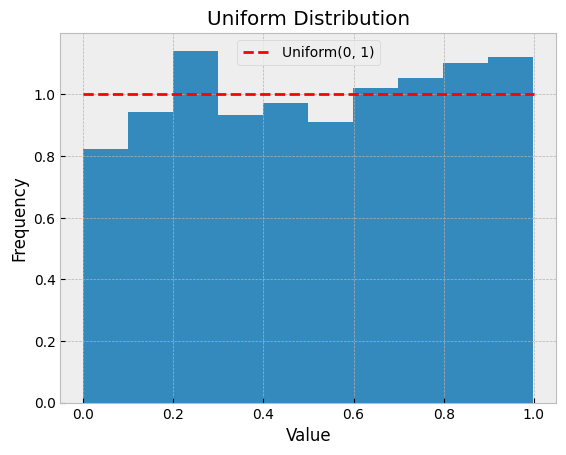

In [47]:
fig, ax = plt.subplots(1, 1)
ax.hist(u, bins=10, density=True)
ax.set_title("Uniform Distribution")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.plot((0, 1), (1, 1), 'r--', label='Uniform(0, 1)')
ax.legend()

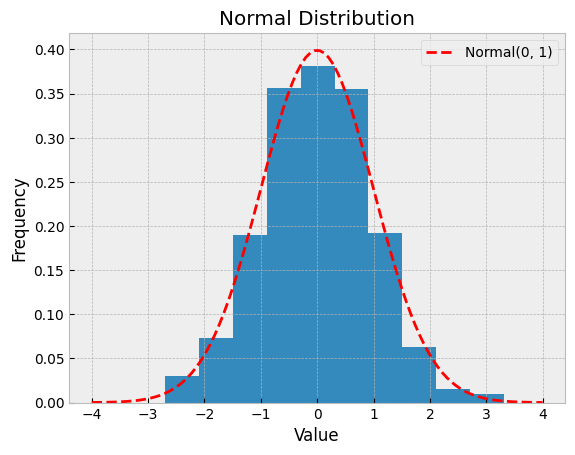

In [48]:
n = np.random.normal(0, 1, 1000) # 10 random numbers from normal distribution
xx = np.linspace(-4, 4, 100)
yy = 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * xx ** 2)

fig, ax = plt.subplots(1, 1)
ax.hist(n, bins=10, density=True)
ax.set_title("Normal Distribution")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.plot(xx, yy, 'r--', label='Normal(0, 1)')
ax.legend()

Don't shy away from the visualization yet, the usual way to plot a graph is as easy as follows: 
1. Create a figure and an axis object using `plt.subplots()`.
2. Use the `ax.hist()`, `ax.line()`, `ax.scatter()` to draw something on the figure.
3. Set the title, label, legend, and other things using `ax.set_title()`, `ax.set_xlabel()`, `ax.set_ylabel()`, and `ax.legend()`, respectively.

This should be sufficient for visualizing something quickly. Try search for `matplotlib` cheatsheet or its official documentation for more information.

## 7: Other Topics

There are many other topics in NumPy that we haven't covered in this notebook and you should explore on your own. Some of the topics include:

- Aggregation functions: NumPy provides many functions for aggregating data, such as `sum()`, `mean()`, `std()`, `min()`, `max()`, etc.
- Linear algebra: NumPy provides many functions for linear algebra, such as `dot()`, `inv()`, `det()`, `eig()`, etc.